In [6]:
import pandas as pd
import numpy as np
import datetime as dt




In [7]:
!pip install yfinance


     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     ------ --------------------------------- 0.5/3.0 MB 1.7 MB/s eta 0:00:02
     ---------- ----------------------------- 0.8/3.0 MB 1.6 MB/s eta 0:00:02
     ------------- -------------------------- 1.0/3.0 MB 1.6 MB/s eta 0:00:02
     ----------------- ---------------------- 1.3/3.0 MB 1.5 MB/s eta 0:00:02
     -------------------- ------------------- 1.6/3.0 MB 1.5 MB/s eta 0:00:01
     ------------------------ --------------- 1.8/3.0 MB 1.4 MB/s eta 0:00:01
     --------------------------- ------------ 2.1/3.0 MB 1.3 MB/s eta 0:00:01
     --------------------------- ------------ 2.1/3.0 MB 1.3 MB/s eta 0:00:01
     ------------------------------- -------- 2.4/3.0 MB 1.1 MB/s eta 0:00:01
     ---------------------------------- ----- 2.6/3.0 MB 1.1 MB/s eta 0:00:01
     -------------------------------------- - 2.9/3.0 MB 1.1 MB/s eta 0:00:01


In [9]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt

years = 15

endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=365*years)

tickers = ['SPY', 'AAPL', 'TSLA', 'AMZN', 'MSFT']

In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define 5 stocks (you can modify as needed)
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META']
start_date = '2022-01-01'
end_date = '2023-01-01'

# Download adjusted close prices
price_data = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    price_data[ticker] = data['Close']

# Compute daily log returns
log_returns = np.log(price_data / price_data.shift(1)).dropna()



C:\Users\HP\AppData\Local\Temp\ipykernel_5800\1520820095.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\HP\AppData\Local\Temp\ipykernel_5800\1520820095.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\HP\AppData\Local\Temp\ipykernel_5800\1520820095.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\HP\AppData\Local\Temp\ipykernel_5800\1520820095.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_d

In [13]:
weights = np.repeat(0.20, 5)  # 5 stocks, 20% each


In [14]:
portfolio_returns = log_returns.dot(weights)


In [15]:
confidence_levels = [0.90, 0.95, 0.99]


In [16]:
# parametric var calculation 
mean = portfolio_returns.mean()
std = portfolio_returns.std()

print("Parametric VaR (1-day):")
for cl in confidence_levels:
    z = abs(np.percentile(np.random.normal(0, 1, 100000), (1 - cl) * 100))
    var = mean - z * std
    print(f"{int(cl*100)}% confidence level: {-var:.5f}")


Parametric VaR (1-day):
90% confidence level: 0.03414
95% confidence level: 0.04308
99% confidence level: 0.06013


In [17]:
#historical var calculation 
print("\nHistorical Simulation VaR (1-day):")
for cl in confidence_levels:
    var = np.percentile(portfolio_returns, (1 - cl) * 100)
    print(f"{int(cl*100)}% confidence level: {-var:.5f}")



Historical Simulation VaR (1-day):
90% confidence level: 0.03223
95% confidence level: 0.04135
99% confidence level: 0.06492


In [18]:
#monte carlos simulation var 
print("\nMonte Carlo Simulation VaR (1-day):")
simulations = np.random.normal(mean, std, 10000)
for cl in confidence_levels:
    var = np.percentile(simulations, (1 - cl) * 100)
    print(f"{int(cl*100)}% confidence level: {-var:.5f}")



Monte Carlo Simulation VaR (1-day):
90% confidence level: 0.03421
95% confidence level: 0.04264
99% confidence level: 0.06048


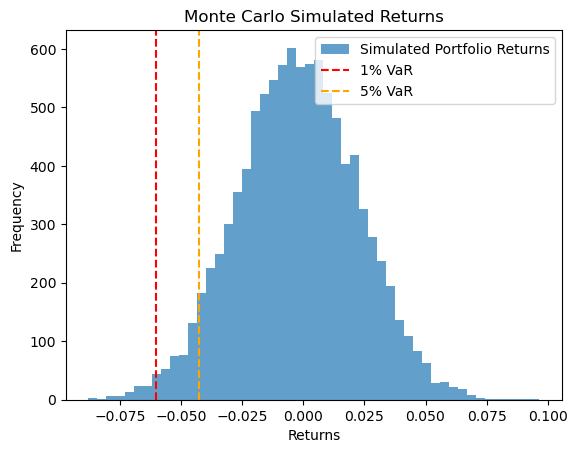

In [19]:
# plotting the graph 
plt.hist(simulations, bins=50, alpha=0.7, label='Simulated Portfolio Returns')
plt.axvline(x=np.percentile(simulations, 1), color='r', linestyle='--', label='1% VaR')
plt.axvline(x=np.percentile(simulations, 5), color='orange', linestyle='--', label='5% VaR')
plt.legend()
plt.title("Monte Carlo Simulated Returns")
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.show()


In [20]:
 #Enhanced VaR & CVaR Portfolio Analysis Code
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === USER INPUTS === #
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META']
start_date = '2022-01-01'
end_date = '2023-01-01'
portfolio_value = 1_000_000  # in dollars
time_horizon_days = 10  # e.g. 10-day VaR
confidence_levels = [0.90, 0.95, 0.99]

# === DATA DOWNLOAD === #
price_data = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    price_data[ticker] = data['Close']

log_returns = np.log(price_data / price_data.shift(1)).dropna()
weights = np.repeat(1 / len(tickers), len(tickers))  # equal weights
portfolio_returns = log_returns.dot(weights)

mean = portfolio_returns.mean()
std = portfolio_returns.std()

# === FUNCTION TO CALCULATE VAR AND CVAR === #
def compute_var_cvar(returns, method, cl, horizon):
    if method == 'parametric':
        z = abs(np.percentile(np.random.normal(0, 1, 100000), (1 - cl) * 100))
        var = - (mean * horizon - z * std * np.sqrt(horizon)) * portfolio_value
        cvar = - portfolio_value * (mean * horizon - std * np.sqrt(horizon) * 
                                    (np.exp(-0.5 * z ** 2) / (np.sqrt(2 * np.pi) * (1 - cl))))
    
    elif method == 'historical':
        var = -np.percentile(returns, (1 - cl) * 100) * portfolio_value * np.sqrt(horizon)
        cvar = -returns[returns <= np.percentile(returns, (1 - cl) * 100)].mean() * portfolio_value * np.sqrt(horizon)
    
    elif method == 'monte_carlo':
        simulated_returns = np.random.normal(mean, std, 10000)
        var = -np.percentile(simulated_returns, (1 - cl) * 100) * portfolio_value * np.sqrt(horizon)
        cvar = -simulated_returns[simulated_returns <= np.percentile(simulated_returns, (1 - cl) * 100)].mean() * portfolio_value * np.sqrt(horizon)
    
    return var, cvar


C:\Users\HP\AppData\Local\Temp\ipykernel_5800\990622063.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\HP\AppData\Local\Temp\ipykernel_5800\990622063.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\HP\AppData\Local\Temp\ipykernel_5800\990622063.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\HP\AppData\Local\Temp\ipykernel_5800\990622063.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date,

In [21]:
methods = ['parametric', 'historical', 'monte_carlo']

for method in methods:
    print(f"\n=== {method.upper()} METHOD ===")
    for cl in confidence_levels:
        var, cvar = compute_var_cvar(portfolio_returns, method, cl, time_horizon_days)
        print(f"{int(cl*100)}% VaR over {time_horizon_days} days: ${var:,.2f}")
        print(f"{int(cl*100)}% CVaR over {time_horizon_days} days: ${cvar:,.2f}")



=== PARAMETRIC METHOD ===
90% VaR over 10 days: $123,458.47
90% CVaR over 10 days: $161,137.06
95% VaR over 10 days: $152,401.81
95% CVaR over 10 days: $183,906.53
99% VaR over 10 days: $205,092.48
99% CVaR over 10 days: $234,953.16

=== HISTORICAL METHOD ===
90% VaR over 10 days: $101,914.37
90% CVaR over 10 days: $150,488.15
95% VaR over 10 days: $130,755.06
95% CVaR over 10 days: $181,727.88
99% VaR over 10 days: $205,303.56
99% CVaR over 10 days: $259,431.85

=== MONTE_CARLO METHOD ===
90% VaR over 10 days: $108,895.66
90% CVaR over 10 days: $147,128.37
95% VaR over 10 days: $136,965.49
95% CVaR over 10 days: $170,160.77
99% VaR over 10 days: $191,079.26
99% CVaR over 10 days: $216,613.92


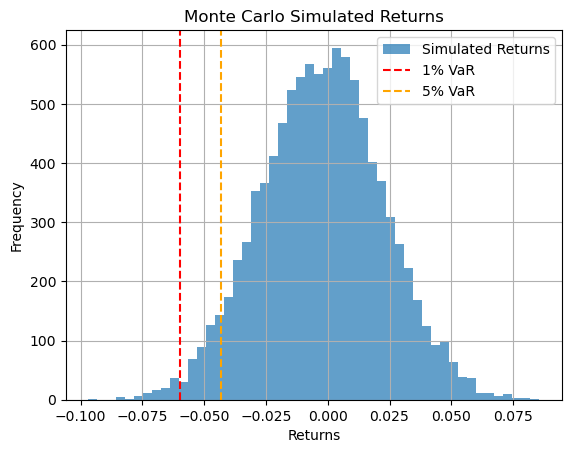

In [22]:
simulated = np.random.normal(mean, std, 10000)
plt.hist(simulated, bins=50, alpha=0.7, label='Simulated Returns')
plt.axvline(x=np.percentile(simulated, 1), color='r', linestyle='--', label='1% VaR')
plt.axvline(x=np.percentile(simulated, 5), color='orange', linestyle='--', label='5% VaR')
plt.title("Monte Carlo Simulated Returns")
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()



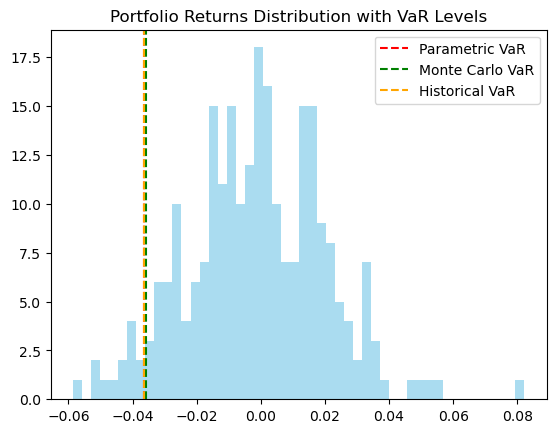

In [32]:
import matplotlib.pyplot as plt

# Histogram of portfolio returns
plt.hist(portfolio_returns, bins=50, alpha=0.7, color='skyblue')
plt.axvline(-var_parametric, color='red', linestyle='dashed', label=f'Parametric VaR')
plt.axvline(-var_mc, color='green', linestyle='dashed', label=f'Monte Carlo VaR')
plt.axvline(-var_hist, color='orange', linestyle='dashed', label=f'Historical VaR')
plt.title('Portfolio Returns Distribution with VaR Levels')
plt.legend()
plt.show()
